In [51]:
import tomotopy as tp
import numpy as np
import nltk
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
def jaccard_similarity(topic1, topic2):
    return float(len(set(topic1).intersection(set(topic2)))/len(set(topic1).union(set(topic2))))

In [53]:
dtm_model = tp.DTModel().load('./models/phase1_model.bin')
dtm_model.summary(topic_word_top_n=15)

<Basic Info>
| DTModel (current version: 0.12.3)
| 171848 docs, 922321 words
| Total Vocabs: 44753, Used Vocabs: 19467
| Entropy of words: 8.01764
| Entropy of term-weighted words: 8.01764
| Removed Vocabs: <NA>
|
<Training Info>
| Iterations: 5000, Burn-in steps: 0
| Optimization Interval: 10
| Log-likelihood per word: -5.72060
|
<Initial Parameters>
| tw: TermWeight.ONE
| min_cf: 3 (minimum collection frequency of words)
| min_df: 0 (minimum document frequency of words)
| rm_top: 0 (the number of top words to be removed)
| k: 40 (the number of topics between 1 ~ 32767)
| t: 24 (the number of timpoints)
| alpha_var: 0.1 (transition variance of alpha (per-document topic distribution))
| eta_var: 0.1 (variance of eta (topic distribution of each document) from its alpha )
| phi_var: 0.1 (transition variance of phi (word distribution of each topic))
| lr_a: 0.01 (shape parameter `a` greater than zero, for SGLD step size calculated as `e_i = a * (b + i) ^ (-c)`)
| lr_b: 0.1 (shape paramete

|  t=16 (56) : 부작용 추가접종 몸 많다 효과 후유증 가능하다 정부 면역 예방접종 바이오 신청 질병관리청 무조건 결론
|  t=17 (81) : 효과 혈통 고생 부작용 완료 많다 주사 오미크론 아픔 한국 미국 치료 정부 확진 면역
|  t=18 (81) : 부작용 혈통 예약 추가접종 괜찮다 완료 주사 승인 친구 정부 연구 예방접종 이름 덜하다 발열
|  t=19 (55) : 아프다 괜찮다 팔 오미크론 타이레놀 가능하다 후유증 고민 문제 친구 감염 기존 잠 결과 결론
|  t=20 (153) : 독감 아프다 잔여백신 오미크론 동절기 예약 추가접종 대응 심하다 승인 이상하다 발표 혈통 부작용 완료
|  t=21 (261) : 아프다 동절기 혈통 추가접종 독감 완료 증상 부위 두통 바이러스 팔 개량 변이 타이레놀 많다
|  t=22 (123) : 혈통 괜찮다 동절기 예약 몸살 차갑다 요가 보신 아프다 추가접종 팔 병원 오미크론 증상 효과
|  t=23 (104) : 병원 혈통 추가접종 괜찮다 미국 세계 캐터필러 섹파 동절기 부작용 완료 잔여백신 타이레놀 많다 감염
| #5 (18860)
|  t=0 (390) : 문재인 정부 피 국민 효과 문제 확보 공급 면역 주사기 효능 무조건 안전성 포함 제품
|  t=1 (474) : 문재인 혈전 중단 미국 효과 면역 쓰레기 언론 두통 결과 발생 상태 한국 정부 문제
|  t=2 (828) : 미국 정부 문재인 공급 현재 국민 확보 한국 나라 위탁 작년 문제 계약 반응 대통령
|  t=3 (853) : 미국 한국 바이오 쓰레기 정부 국민 계약 영국 위탁 생산 집 추가 독일 기술 친구
|  t=4 (1636) : 회사 미국 신청 젊다 친구 엄마 델타변이 이유 대구시 고함 한국 주변 다음주 아빠 국민
|  t=5 (1294) : 신청 한국 엄마 성공하다 후유증 이야기 부럽다 친구 약 문제 고생 약하다 델타변이 안좋다 준비
|  t=6 (3207) : 다음주 미열 기분 식욕 컨디션 집 주변 거리 심장 효과 어깨 저녁 피곤

|  t=6 (3062) : 식욕 아빠 가슴 일주일 힘들다 기운 거리 집 다음주 다행 신청 회사 약하다 신분 일정
|  t=7 (3174) : 가슴 심장 집 대기 컨디션 경과 기운 거리 미열 상태 아빠 힘 이상하다 저녁 미치다
|  t=8 (2353) : 심장 집 컨디션 새벽 미치다 기분 운동 종일 대기 출근 아침 다음주 약 상태 기운
|  t=9 (881) : 고생 집 일주일 독감 친구 치료 심장 엄청나다 상태 저녁 효과 운동 종일 회사 접종자
|  t=10 (1042) : 엄마 엄청나다 미국 아빠 종일 이상하다 일부 약 고생 심장 집 교차접종 아침 반응 문제
|  t=11 (1031) : 힘들다 기분 심하다 고생 상태 부위 친구 컨디션 문제 가능하다 일찍 용량 머리 엄마 심장
|  t=12 (422) : 한국 고민 나쁘다 탈모 키트 힘들다 부위 심하다 약 엄마 두통 친구 집 다행 엄청나다
|  t=13 (249) : 얘기 고생 의사 몸살 머리 검사 밥 고통 무증상 관련 입원 감소 식사 셀카 이입
|  t=14 (106) : 의사 이상하다 별로 몸 증상 힘들다 근육통 심하다 타이레놀 상태 부위 오한 일주일 고민 이름
|  t=15 (75) : 어린이 괜찮다 많다 생리 효과 미국 잠 예정 검사 결과 가슴 운동 인정 개발 확실하다
|  t=16 (46) : 부작용 추가접종 괜찮다 병원 약 미국 심장 면역 개발 고열 방역 가다실 제약사 영향 알약
|  t=17 (84) : 예약 아프다 혈통 부작용 완료 병원 팔 근육통 몸살 한국 미국 치료 이상하다 일본 검색
|  t=18 (78) : 개량 회사 약 아프다 부작용 괜찮다 완료 팔 증상 한국 약하다 생리 걱정 감염 건강하다
|  t=19 (64) : 아프다 혈통 약물 지난달 추가접종 부작용 독감 주사 타이레놀 많다 멀쩡하다 두통 반응 일본 미치다
|  t=20 (178) : 아프다 동절기 예약 잔여백신 독감 신청 새롭다 혈통 추가접종 괜찮다 근육통 선택 멀쩡하다 후유증 신예
|  t=21 (246) : 아프다 동절기

|  t=22 (119) : 아프다 동절기 추가접종 예약 몸살 몸 타이레놀 감염 오전 이스라엘 기어 즌 혈통 독감 괜찮다
|  t=23 (87) : 아프다 상태 일찍 동절기 부작용 팔 개량 타이레놀 의사 심하다 친구 다행 바이러스 약 홍콩
| #16 (19077)
|  t=0 (416) : 미국 질병관리청 문재인 한국 정부 문제 대통령 면역 뻐근하다 이야기 피 효능 도움 생산 효과
|  t=1 (441) : 큰일 미국 일본 한국 국민 생산 문제 혈전 힘들다 영국 거부 정상 굳이 문재인 심하다
|  t=2 (857) : 문재인 문제 생산 확보 국민 정부 언론 계약 대통령 효과 가능하다 의사 중국 이유 러시아
|  t=3 (887) : 생산 미국 문재인 혈전 쓰레기 바이오 기자 높다 국민 신청 면역 국내 대통령 국가 옥스퍼드
|  t=4 (1630) : 미국 정부 남편 대구시 신청 친구 현재 확실하다 한국 회사 주변 식욕 부럽다 어차피 다행
|  t=5 (1285) : 친구 효과 반응 약하다 아빠 가슴 컨디션 집 아침 다음주 회사 경과 후유증 당일 어지럽다
|  t=6 (3130) : 친구 아침 미치다 미열 집 아프다 아빠 피곤하다 주변 성공하다 반응 다행 문자 약 경과
|  t=7 (3158) : 가슴 아침 친구 컨디션 안좋다 반응 집 경과 아프다 식욕 운동 대기 미치다 출근 기분
|  t=8 (2498) : 친구 아침 덥다 아프다 독감 새벽 집 상태 스티커 다행 컨디션 일주일 기분 경과 온몸
|  t=9 (882) : 독감 친구 예정 고생 다행 어깨 검사 치료 아프다 상태 집 새벽 종일 고열 접종자
|  t=10 (1059) : 약 엄마 미치다 효과 오미크론 결과 친구 부위 상태 예정 기운 경과 덥다 정부 죽
|  t=11 (1012) : 잠 효과 힘들다 약 미치다 엄청나다 기운 반응 다행하다 점심 거부 친구 멀다 머리 상태
|  t=12 (410) : 머리 약 엄청나다 기운 오미크론 아빠 두통 엄마 잠 부위 차갑다 집 교차접종 주변 가능하다
|  t=13 (

|  t=13 (261) : 아픔 일부 몸살 많다 멀쩡하다 엄청나다 차갑다 효과 오미크론 겨드랑이 미열 감염 남편 인정 인생
|  t=14 (113) : 안좋다 병원 음성 여명 괜찮다 심하다 걱정 아픔 엄마 잔여백신 효과 오미크론 한국 정부 약하다
|  t=15 (84) : 나안 퍼트 추가접종 병원 많다 엄마 집 다행 아빠 항체 결과 컨디션 스티커 문재인 확실하다
|  t=16 (51) : 몸 많다 한국 미치다 개발 선생님 관련 거리 용량 왼쪽 추가 나이 불 뿐 기업
|  t=17 (88) : 완료 많다 몸살 격리 연 예약 효과 친구 선택 걱정 의사 반응 무섭다 바이러스 목
|  t=18 (77) : 아프다 혈통 괜찮다 개발 예약 완료 팔 증상 타이레놀 미국 걱정 예정 확진 다행 기저질환
|  t=19 (68) : 예약 상태 청소년 부작용 완료 팔 가능하다 미국 정부 감기 개발 미치다 접종자 검사 안해
|  t=20 (141) : 추가접종 예약 잔여백신 병원 오미크론 문제 아프다 혈통 대응 금요일 덜하다 움 독감 부작용 괜찮다
|  t=21 (255) : 혈통 아프다 다음주 동절기 추가접종 아픔 허리 예약 독감 팔 개량 뻐근하다 신청 후유증 기억
|  t=22 (145) : 혈통 아프다 동절기 추가접종 예약 부작용 안좋다 긴급 괜찮다 팔 오미크론 몸살 개량 많다 고민
|  t=23 (99) : 아프다 혈통 추가접종 중국 인터뷰 동절기 독감 잔여백신 증상 근육통 몸살 통증 컨디션 가격 휴가
| #22 (24143)
|  t=0 (382) : 문재인 예약 효과 미국 일본 우리나라 한국 국민 문제 접종자 러시아 의료진 의료 안전성 특수
|  t=1 (467) : 예약 한국 문재인 큰일 확보 대통령 몸 국민 혈전 회사 발생 사망 일정 가격 미국
|  t=2 (967) : 예약 미국 확보 공급 큰일 정부 효과 생산 혈전 한국 계약 언론 쓰레기 반응 선택
|  t=3 (1269) : 예약 미국 한국 바이오 돈 사이언스 엄마 정부 국민 방역 위탁 노쇼 생산 문재인 회사
|

|  t=3 (890) : 생산 한국 엄마 아빠 사이언스 정부 언론 문제 국민 계약 승인 변이 전화 사망 집단
|  t=4 (1653) : 잠 엄마 한국 대구시 다음주 얘기 회사 미국 정부 경과 성공하다 친구 약하다 식욕 기분
|  t=5 (1355) : 잠 친구 신청 다음주 델타변이 엄청나다 예정 한국 엄마 휴가 가슴 아빠 저녁 일주일 가능하다
|  t=6 (3664) : 잠 가슴 효과 아빠 후유증 컨디션 다음주 일주일 미치다 예정 집 약 어깨 검사 피로
|  t=7 (3898) : 잠 가슴 경과 심장 컨디션 미치다 고생 일주일 저녁 대기 다행 다음주 당일 상태 생리통
|  t=8 (2818) : 잠 아침 경과 미치다 심장 문제 힘 가슴 다행 고생 반응 기운 독감 밥 약
|  t=9 (954) : 잠 고생 약 독감 접종자 치료 허리 더하다 친구 일주일 새벽 기분 예정 기운 가능하다
|  t=10 (1143) : 잠 다행 팔도 나이 예정 의사 가능하다 오한 이유 절반 언론 상태 아침 효과 기운
|  t=11 (1050) : 잠 머리 예정 고생 문제 고민 수혈 심하다 약 아침 다음주 기운 기분 반응 오한
|  t=12 (431) : 잠 몸살 친구 집 효과 겨드랑이 저녁 고민 확진자 일해 머리 심하다 통증 엄마 예정
|  t=13 (255) : 확진자 마스크 힘들다 머리 걱정 집 미치다 엄청나다 문제 치료 음성 한달 당하다 궁금하다 발생
|  t=14 (115) : 몸 집 약하다 목 새롭다 예방 군살 병원 예약 주사 약 통증 고생 엄마 효과
|  t=15 (81) : 힘들다 미국 신분 절반 괜찮다 근육통 주사 타이레놀 머리 약 친구 엄마 의사 심장 반응
|  t=16 (51) : 부작용 아픔 증상 몸 오미크론 멀쩡하다 회사 심장 감염 검사 바이오 말씀 단백질 포함 가안
|  t=17 (113) : 시점 퀄컴 아프다 예약 괜찮다 완료 팔 몸 주사 근육통 심하다 효과 엄마 의사 상태
|  t=18 (78) : 치료 괜찮다 이름 증상 몸 몸살 한국 아픔 힘들다 걱정 약

|  t=17 (100) : 부작용 고민 인정 아프다 예약 잔여백신 한국 약 선택 상태 부위 다행 확진자 작년 어깨
|  t=18 (86) : 아프다 부작용 혈통 뻐근하다 생리 기저질환 예약 괜찮다 병원 주사 몸살 심하다 효과 힘들다 문제
|  t=19 (59) : 아프다 고생 괜찮다 완료 팔 병원 오미크론 가능하다 후유증 교차접종 기존 인정 운동 일본 긴급
|  t=20 (156) : 멀쩡하다 잔여백신 예약 독감 아프다 주사 오미크론 타이레놀 기존 아침 식품의약품안전처 카카오 혈통 동절기 추가접종
|  t=21 (266) : 혈통 아프다 예약 팔 동절기 추가접종 잔여백신 완료 개량 몸살 효과 교차접종 허리 괜찮다 병원
|  t=22 (129) : 아프다 혈통 많다 예약 부작용 독감 오미크론 친구 차갑다 이야기 추가접종 괜찮다 완료 잔여백신 병원
|  t=23 (104) : 아프다 혈통 선택 개발 다행 예약 추가접종 독감 팔 타이레놀 변이 아픔 추가 신청 회사
| #33 (22830)
|  t=0 (429) : 피 효과 문재인 한국 승인 의료진 공급 쓰레기 도대체 미국 국민 생산 확보 면역 영국
|  t=1 (455) : 문재인 큰일 국민 일본 생산 효과 면역 통증 예정 선택 우리나라 유럽 안전하다 독감 고열
|  t=2 (834) : 미국 한국 정부 생산 확보 국민 국내 러시아 문재인 문제 공급 회사 큰일 영국 중국
|  t=3 (841) : 한국 생산 미국 엄마 아빠 문제 혈전 상태 언론 약하다 삼성 생리 쓰레기 기자 예비군
|  t=4 (1740) : 생리 신청 미국 친구 정부 구매 반응 미치다 엄마 얘기 거리 상황 젊다 대구시 손
|  t=5 (1509) : 생리 친구 델타변이 다음주 미열 회사 어지럽다 신청 엄마 다행하다 다행 반응 저녁 얘기 정부
|  t=6 (4236) : 생리 친구 미열 저녁 미치다 거리 당일 후유증 가슴 일주일 약하다 덥다 다음주 상태 집
|  t=7 (4447) : 생리 친구 미열 아침 엄청나다 상태 미치다 거리 주변 심장 경

|  t=7 (3171) : 다행 가슴 부위 당일 컨디션 친구 아침 상태 주변 안좋다 엄마 일주일 다음주 약 대기
|  t=8 (2299) : 다행 친구 아침 일주일 엄마 주변 부위 집 독감 차일 피곤하다 덥다 왼쪽 확실하다 가슴
|  t=9 (889) : 친구 약 다행 엄청나다 교차접종 독감 부위 머크 엄마 힘들다 고생 아침 집 다음주 주변
|  t=10 (1006) : 금요일 미국 잠 컨디션 의사 반응 여로 부위 힘들다 엄마 친구 다행 아침 예정 저녁
|  t=11 (998) : 다음주 약 겨드랑이 부위 심하다 주변 예정 정신 수혈 머리 몸살 잠 심장 저녁 새벽
|  t=12 (435) : 머리 힘들다 멀쩡하다 주변 집 미치다 약 엄마 차갑다 교차접종 반응 일주일 검사 밥 경과
|  t=13 (253) : 검사 몸살 양성 머리 심하다 생리 고생 주변 힘 감염 아기 어지럼증 미접종자 무조건 쉬
|  t=14 (104) : 생리 오미크론 격리 덜하다 증상 몸살 힘들다 주사 심하다 두통 친구 고생 면역 치료 음성
|  t=15 (101) : 미국 인정 발생 완료 많다 약 무섭다 미치다 교차접종 의사 엄청나다 예정 회사 결과 가족
|  t=16 (53) : 구렁이 아프다 병원 문제 집 감염 승인 선생님 바이러스 가다실 사랑 높다 원하다 추가 차안
|  t=17 (77) : 아프다 의사 데이터 엄마 생리 개발 고민 미치다 얘기 치료 음성 준비 덥다 일정 보건소
|  t=18 (65) : 아프다 완료 몸 병원 증상 근육통 무섭다 감염 미치다 연구 일주일 검색 인생 양성 덜하다
|  t=19 (51) : 혈통 오미크론 아프다 부작용 독감 주사 통증 효과 승인 일본 관련 빠르다 망하다 긴급 돈
|  t=20 (149) : 독감 아프다 잔여백신 혈통 부작용 괜찮다 증상 변이 얘기 마지막 네이버 의원 스카이 예약 동절기
|  t=21 (273) : 혈통 아프다 예약 추가접종 독감 가볍다 괜찮다 동절기 주사 근육통 오미크론 몸 타이레놀 변이 몸살
|  t=22 (140) : 

월 별 문서수 시각화

In [55]:
buckets = [[] for _ in range(dtm_model.k)]
i=0
for d in dtm_model.docs:
    buckets[d.get_topics(top_n=1)[0][0]].append(d)
    i+=1
arr = np.empty(40)
for k in range(dtm_model.k):
    print(f'Num docs belonging to topic {k}: {len(buckets[k])} ({len(buckets[k])/177631})')
    arr[k] = len(buckets[k])

'''sorted_portion =  np.sort(arr)[::-1] 
for i in sorted_portion[:10]:
    for topic in range(50):
        if i == arr[topic]:
            print("topic",topic," (",i/len(sorted_portion)*100," )")
            print(dtm_model.get_topic_words(topic))
print('---------------------------------------------------------------')'''

Num docs belonging to topic 0: 5505 (0.030991212119506166)
Num docs belonging to topic 1: 8733 (0.049163715792851476)
Num docs belonging to topic 2: 7929 (0.04463747881844948)
Num docs belonging to topic 3: 5883 (0.03311921905523248)
Num docs belonging to topic 4: 3354 (0.018881839318587407)
Num docs belonging to topic 5: 2582 (0.014535751079485)
Num docs belonging to topic 6: 2727 (0.015352050036311229)
Num docs belonging to topic 7: 2259 (0.012717374782554847)
Num docs belonging to topic 8: 2169 (0.012210706464524773)
Num docs belonging to topic 9: 1634 (0.009198844796234892)
Num docs belonging to topic 10: 1611 (0.009069362892738317)
Num docs belonging to topic 11: 5014 (0.02822705496225321)
Num docs belonging to topic 12: 5309 (0.02988780111579623)
Num docs belonging to topic 13: 2061 (0.011602704482888686)
Num docs belonging to topic 14: 2174 (0.012238854704415334)
Num docs belonging to topic 15: 2266 (0.012756782318401631)
Num docs belonging to topic 16: 2300 (0.01294819034965743

'sorted_portion =  np.sort(arr)[::-1] \nfor i in sorted_portion[:10]:\n    for topic in range(50):\n        if i == arr[topic]:\n            print("topic",topic," (",i/len(sorted_portion)*100," )")\n            print(dtm_model.get_topic_words(topic))\nprint(\'---------------------------------------------------------------\')'

In [ ]:
sum(arr)

In [8]:
# 0 24.2%
# 1 14.5%
# 2 13.9%
# 5 8.6%
# 7 8.3%

# jaccard similarity

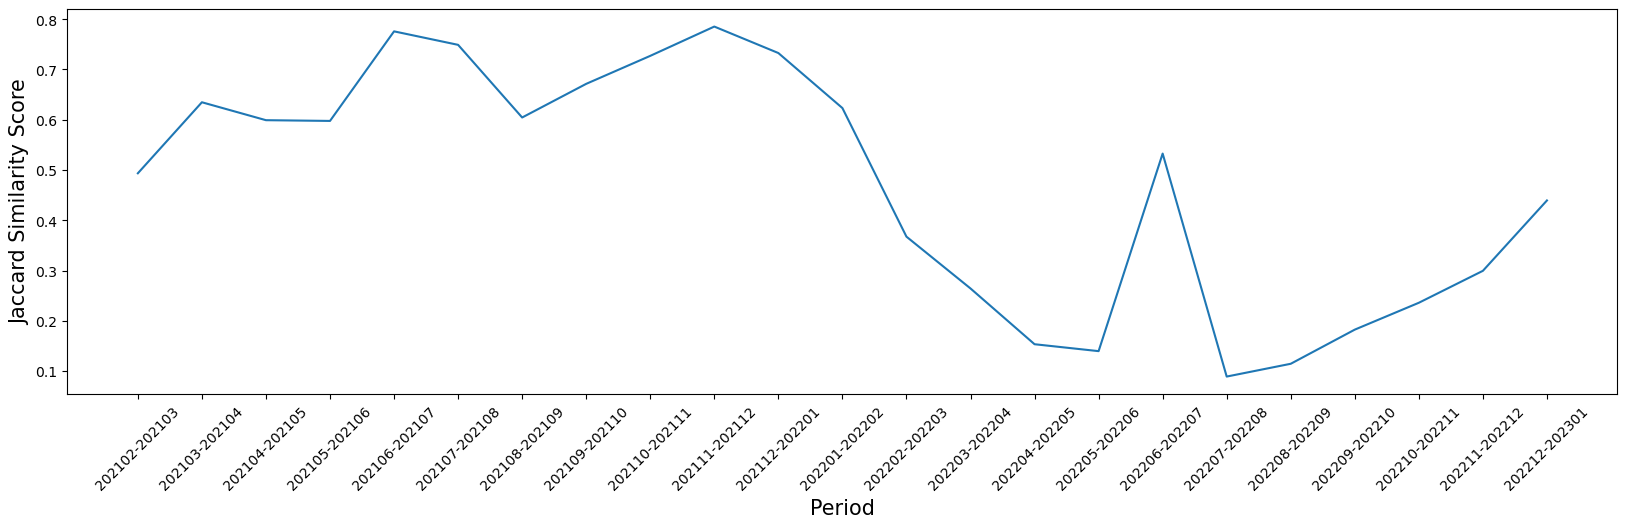

In [31]:
# topic 8
dates = ['202102-202103','202103-202104','202104-202105','202105-202106','202106-202107','202107-202108','202108-202109','202109-202110'
        ,'202110-202111','202111-202112','202112-202201','202201-202202','202202-202203','202203-202204','202204-202205','202205-202206'
        ,'202206-202207','202207-202208','202208-202209','202209-202210','202210-202211','202211-202212','202212-202301']#,'202301']

plt.figure(figsize = (20,5))
all_score = []

for timepoint in range(1, dtm_model.num_timepoints):
    score = 0
    for topic_num in range(10): 
        pre_topic = [word[0] for word in dtm_model.get_topic_words(topic_id=topic_num, timepoint = timepoint-1)]
        next_topic = [word[0] for word in dtm_model.get_topic_words(topic_id=topic_num, timepoint = timepoint)]
        score += jaccard_similarity(pre_topic, next_topic)
    all_score.append(score/10)
    
plt.plot(all_score)
plt.ylabel("Jaccard Similarity Score", fontsize = 15)
plt.xlabel("Period", fontsize = 15)
plt.xticks(range(dtm_model.num_timepoints-1),labels = dates, rotation = 45)
#plt.legend()
plt.savefig("./figure/jaccard similarity score", bbox_inches='tight')
#print(f"average word2vec similarity score : {score/(dtm_model.num_timepoints-1)}")